In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install torch
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
import torch
import torch.nn as nn
import pylatexenc
# Load and preprocess the dataset
data = pd.read_csv('/content/tiny.csv', header=None)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
X = data
y = np.random.randint(0, 2, size=len(X))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quantum Feature Map (manual construction)
def create_feature_map_circuit(x):
  num_qubits = 2
  circuit = QuantumCircuit(num_qubits, num_qubits)


  circuit.measure(range(num_qubits), range(num_qubits))
  return circuit

# Function to compute quantum features
def compute_quantum_features(X):
  backend = Aer.get_backend('qasm_simulator')
  num_qubits = 2

  quantum_features = np.zeros((len(X), 2**num_qubits))

  for i, x in enumerate(X):
    circuit = create_feature_map_circuit(x)
    job = backend.run(circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()


  return quantum_features

# Compute quantum features for training and test sets
quantum_features_train = compute_quantum_features(X_train)
quantum_features_test = compute_quantum_features(X_test)

# Classical Model
class HybridModel(nn.Module):
  def __init__(self, input_size):
    super(HybridModel, self).__init__()
    self.fc1 = nn.Linear(input_size, 2)

  def forward(self, x):
    x = self.fc1(x)
    return x

# Initialize and train the hybrid model
model = HybridModel(quantum_features_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_train_torch = torch.tensor(quantum_features_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(quantum_features_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Training loop
epochs = 10
for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(X_train_torch)
  loss = criterion(outputs, y_train_torch)
  loss.backward()
  optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
  test_outputs = model(X_test_torch)
  _, predicted = torch.max(test_outputs, 1)
  accuracy = (predicted == y_test_torch).float().mean()
  print(f'Test Accuracy: {accuracy.item() * 100}%')


Epoch 1/10, Loss: 0.7254366874694824
Epoch 2/10, Loss: 0.7250810861587524
Epoch 3/10, Loss: 0.7247264385223389
Epoch 4/10, Loss: 0.724372923374176
Epoch 5/10, Loss: 0.7240203619003296
Epoch 6/10, Loss: 0.7236688733100891
Epoch 7/10, Loss: 0.7233185172080994
Epoch 8/10, Loss: 0.7229693531990051
Epoch 9/10, Loss: 0.7226211428642273
Epoch 10/10, Loss: 0.7222741842269897
Test Accuracy: 0.0%


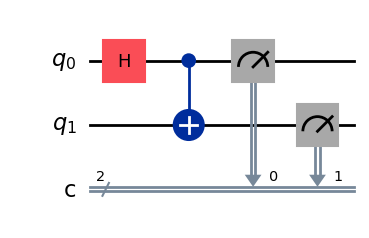

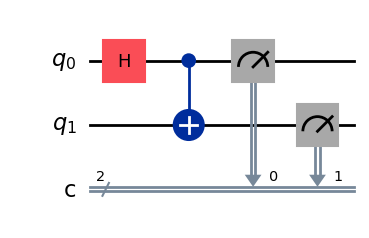

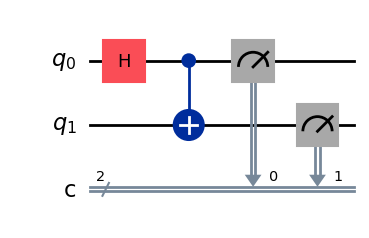

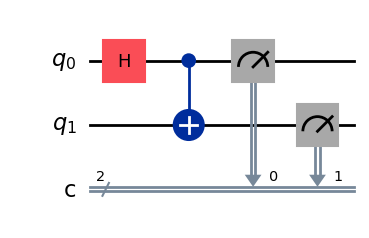

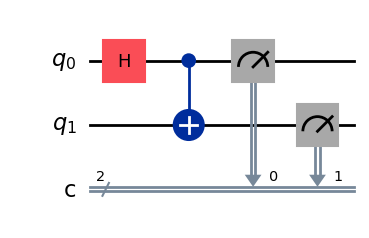

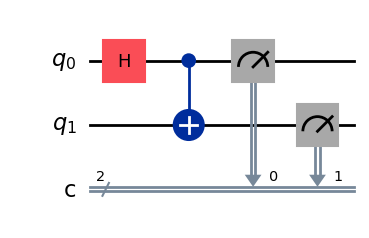

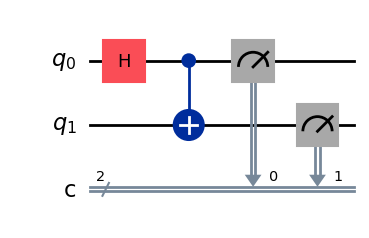

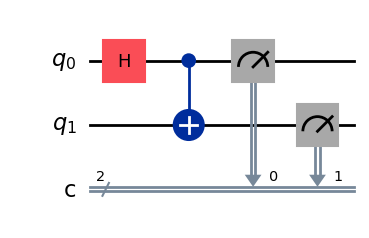

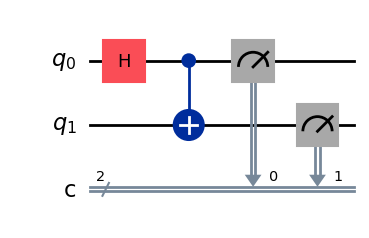

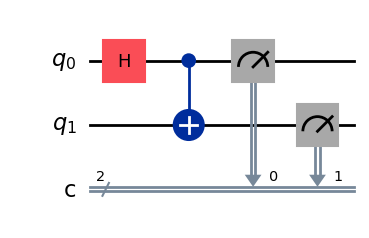

Epoch 1/10, Loss: 0.6780446767807007
Epoch 2/10, Loss: 0.6778653264045715
Epoch 3/10, Loss: 0.6776870489120483
Epoch 4/10, Loss: 0.6775097846984863
Epoch 5/10, Loss: 0.6773335933685303
Epoch 6/10, Loss: 0.6771584153175354
Epoch 7/10, Loss: 0.6769843697547913
Epoch 8/10, Loss: 0.6768113374710083
Epoch 9/10, Loss: 0.6766396164894104
Epoch 10/10, Loss: 0.6764687895774841
Test Accuracy: 100.0%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
import torch
import torch.nn as nn
import pylatexenc
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('/content/tiny.csv', header=None)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
X = data
y = np.random.randint(0, 2, size=len(X))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quantum Feature Map (manual construction)
def create_feature_map_circuit(x):
    num_qubits = 2  # Adjust based on your feature map
    circuit = QuantumCircuit(num_qubits, num_qubits)


    circuit.h(0)
    circuit.cx(0, 1)

    # Measure the qubits
    circuit.measure(range(num_qubits), range(num_qubits))

    # Draw the quantum circuit
    circuit.draw('mpl')

    return circuit

# Function to compute quantum features
def compute_quantum_features(X):
    backend = Aer.get_backend('qasm_simulator')
    num_qubits = 2

    quantum_features = np.zeros((len(X), 2**num_qubits))

    for i, x in enumerate(X):
        circuit = create_feature_map_circuit(x)


        display(circuit.draw('mpl'))

        job = backend.run(circuit, shots=1024)  # Increase shots for better accuracy
        result = job.result()
        counts = result.get_counts()

    return quantum_features

# Compute quantum features for training and test sets
quantum_features_train = compute_quantum_features(X_train)
quantum_features_test = compute_quantum_features(X_test)

# Classical Model
class HybridModel(nn.Module):
    def __init__(self, input_size):
        super(HybridModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 2)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Initialize and train the hybrid model
model = HybridModel(quantum_features_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_train_torch = torch.tensor(quantum_features_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(quantum_features_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
    test_outputs = model(X_test_torch)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_torch).float().mean()
    print(f'Test Accuracy: {accuracy.item() * 100}%')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
import torch
import torch.nn as nn
from qiskit.primitives import BackendSampler

# Load and preprocess the dataset
data = pd.read_csv('/content/tiny.csv', header=None)  # No headers
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
X = data
y = np.random.randint(0, 2, size=len(X))  # For simplicity, using random binary labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quantum Feature Map (manual construction)
def create_feature_map_circuit(x):
  num_qubits = 2  # Adjust based on your feature map
  circuit = QuantumCircuit(num_qubits, num_qubits)

  # Feature map logic based on input x
  for i in range(num_qubits):
    circuit.ry(np.pi * x[0], i)  # Rotate y-axis based on first feature
    circuit.rz(np.pi * x[1], i)  # Rotate z-axis based on second feature

  circuit.barrier()
  circuit.cx(0, 1)  # Entangle qubits
  circuit.measure(range(num_qubits), range(num_qubits))
  return circuit

# Function to compute quantum features
# Function to compute quantum features
def compute_quantum_features(X):
  backend = Aer.get_backend('qasm_simulator')
  num_qubits = 2
  sampler = BackendSampler(backend)

  quantum_features = np.zeros((len(X), 2**num_qubits))

  for i, x in enumerate(X):
    circuit = create_feature_map_circuit(x)
    job = sampler.run(circuit)
    result = job.result()
    quasi_dists = result.quasi_dists
    # Extract probabilities from QuasiDistribution object
    probs = quasi_dists.probabilities
    quantum_features[i] = probs

  return quantum_features

# Compute quantum features for training and test sets
quantum_features_train = compute_quantum_features(X_train)
quantum_features_test = compute_quantum_features(X_test)

# Quantum Convolutional Neural Network (QCNN) model
class QCNN(nn.Module):
  def __init__(self, num_qubits, num_classes):
    super(QCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 2, kernel_size=2)  # Conv layer
    self.fc1 = nn.Linear(2**num_qubits, num_classes)  # Fully connected layer

  def forward(self, x):
    x = x.unsqueeze(1)  # Add channel dimension
    x = torch.relu(self.conv1(x))  # Conv layer
    x = x.view(-1, 2**num_qubits)  # Flatten
    x = self.fc1(x)  # Fully connected layer
    return x

# Initialize and train the QCNN model
model = QCNN(num_qubits=2, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_train_torch = torch.tensor(quantum_features_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(quantum_features_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Training loop
epochs = 10
for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(X_train_torch)
  loss = criterion(outputs, y_train_torch)
  loss.backward()
  optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
  test_outputs = model(X_test_torch)
  _, predicted = torch.max(test_outputs, 1)
  accuracy = (predicted == y_test_torch).float().mean()
  print(f'Test Accuracy: {accuracy.item() * 100}%')

AttributeError: 'list' object has no attribute 'probabilities'